In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.3.0


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
keras = tf.keras
layers = tf.keras.layers

In [5]:
train_image_path = glob.glob('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train/*/*.jpg')

In [6]:
len(train_image_path)

2000

In [7]:
train_image_path[-5:]

['D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\dog\\dog.995.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\dog\\dog.996.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\dog\\dog.997.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\dog\\dog.998.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\dog\\dog.999.jpg']

In [8]:
train_image_label = [int(p.split('\\')[1] == 'cat') for p in train_image_path]

In [9]:
train_image_label[-5:]

[0, 0, 0, 0, 0]

In [10]:
train_image_label[ :5]

[1, 1, 1, 1, 1]

In [11]:
def load_preprosess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3) #channels=3 彩色图片
    image = tf.image.resize(image, [360, 360])
    image = tf.image.random_crop(image,[256,256,3])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.5)
    image = tf.image.random_contrast(image, 0, 1)
    image = tf.cast(image, tf.float32)
    image = image/255
    label=tf.reshape(label,[1]) #[1,2,3]变成[[1],[2],[3]]
    return image, label

In [12]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path, train_image_label))

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [14]:
train_image_ds = train_image_ds.map(load_preprosess_image, num_parallel_calls=AUTOTUNE)

In [15]:
train_image_ds

<ParallelMapDataset shapes: ((256, 256, 3), (1,)), types: (tf.float32, tf.int32)>

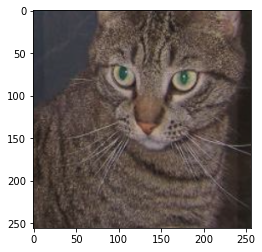

In [47]:
for img, label in train_image_ds.take(2):
    plt.imshow(img)

In [19]:
BATCH_SIZE = 32
train_count = len(train_image_path)

In [40]:
train_image_ds = train_image_ds.shuffle(train_count).repeat().batch(BATCH_SIZE)
train_image_ds = train_image_ds.prefetch(AUTOTUNE)

In [41]:
test_image_path = glob.glob('D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train/*/*.jpg')

In [42]:
test_image_path

['D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.0.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.1.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.10.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.100.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.101.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.102.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.103.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.104.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.105.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.106.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资料/数据集/猫狗数据集_2000/dc_2000/train\\cat\\cat.107.jpg',
 'D:/Study/深度学习/日月光华-tensorflow入门与实战资

In [43]:
test_image_label = [int(p.split('\\')[1] == 'cat') for p in test_image_path]

In [44]:
test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path, test_image_label))
test_image_ds = test_image_ds.map(load_preprosess_image, num_parallel_calls=AUTOTUNE)
test_image_ds = test_image_ds.batch(BATCH_SIZE)
test_image_ds = test_image_ds.prefetch(AUTOTUNE)

In [45]:
imgs,labels=next(iter(train_image_ds))

In [46]:
imgs.shape

TensorShape([32, 256, 256, 3])

In [47]:
labels.shape

TensorShape([32, 1])

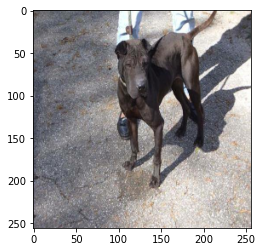

In [48]:
plt.imshow(imgs[0])

In [49]:
model=keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(256,256,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(1024,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1),    
] )

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 512)       1

In [51]:
pred=model(imgs)

In [52]:
pred.shape

TensorShape([32, 1])

In [53]:
np.array([p[0].numpy() for p in tf.cast(pred > 0, tf.int32)])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
np.array([l[0].numpy() for l in labels])

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [55]:
ls= tf.keras.losses.BinaryCrossentropy()

In [56]:
ls([0.,0.,1.,1.],[1.,1.,1.,1.])

<tf.Tensor: shape=(), dtype=float32, numpy=7.6666193>

In [57]:
optimizer=tf.keras.optimizers.Adam()

In [58]:
epoch_loss_avg=tf.keras.metrics.Mean('train_loss')
train_accuray=tf.keras.metrics.Accuracy()

epoch_loss_avg=tf.keras.metrics.Mean('test_loss')
test_accuray=tf.keras.metrics.Accuracy()

In [59]:
def train_step(model,images,labels):
    with tf.GradientTape() as t:
        pred=model(images)
        loss_step=tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels,pred)
    grads=t.gradient(loss_step, model.trainable_variables)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))
    epoch_loss_avg(loss_step)
    train_accuray(labels, tf.cast(pred>0,tf.int32))

In [60]:
def test_step(model,images,labels):
    pred=model(images)
    loss_step=tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels,pred)
    epoch_loss_avg_test(loss_step)
    train_accuray(labels, tf.cast(pred>0,tf.int32))

In [61]:
train_loss_result=[]
train_acc_result=[]
test_loss_result=[]
test_acc_result=[]

In [62]:
num_epoches=30

In [64]:
for epoch in range(num_epoches):

    for img_, labels_ in train_image_ds:
        train_step(model, img_, labels_)
        print('.',end='')
    print()
    
    train_loss_result.append(epoch_loss_avg.result())
    train_acc_result.append(train_accuray.result())
    
    for img_, labels_ in test_image_ds:
        test_step(model, img_, labels_)
         
    test_loss_result.append(epoch_loss_avg_test.result())
    test_acc_result.append(test_accuray.result())     
        
    print('Epoch:{}: loss:{:.3f}, accuracy:{:.3f},test_loss:{:.3f},test_accuracy:{:.3f}'.format(
        epoch +1,
        epoch_loss_avg.result(),
        train_accuray.result(),
        epoch_loss_avg_test.result(),
        test_accuray.result()
    ))
    
    epoch_loss_avg.reset_states()
    train_accuray.reset_states()
    
    epoch_loss_avg_test.reset_states()
    test_accuray.reset_states()
    

epoch:1

.....................................................................................................................

KeyboardInterrupt: 

keras内置经典网络实现

In [ ]:
covn_base = keras.applications.xception.Xception(weights='imagenet', 
                                                 include_top=False,
                                                 input_shape=(256, 256, 3),
                                                 pooling='avg')

In [ ]:
covn_base.trainable = False

In [23]:
covn_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [24]:
model = keras.Sequential()
model.add(covn_base)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 21,911,081
Trainable params: 1,049,601
Non-trainable params: 20,861,480
_________________________________________________________________


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 21,911,081
Trainable params: 1,049,601
Non-trainable params: 20,861,480
_________________________________________________________________


In [27]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.0005),
              loss='binary_crossentropy',
              metrics=['acc'])

In [35]:
initial_epochs = 5

In [29]:
history = model.fit(
    train_image_ds,
    steps_per_epoch=train_count//BATCH_SIZE,
    epochs=initial_epochs,
    validation_data=test_image_ds,
    validation_steps=test_count//BATCH_SIZE)

Train for 62 steps, validate for 31 steps
Epoch 1/10


W0914 23:37:56.575596 11528 deprecation.py:323] From c:\users\guanghua\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


62/62 [==============================] - 107s 2s/step - loss: 0.1681 - acc: 0.9390 - val_loss: 0.3308 - val_acc: 0.8881
Epoch 2/10
62/62 [==============================] - 99s 2s/step - loss: 0.0800 - acc: 0.9753 - val_loss: 0.0709 - val_acc: 0.9738
Epoch 3/10
62/62 [==============================] - 114s 2s/step - loss: 0.0530 - acc: 0.9824 - val_loss: 0.2589 - val_acc: 0.9304
Epoch 4/10
62/62 [==============================] - 116s 2s/step - loss: 0.0740 - acc: 0.9758 - val_loss: 0.2762 - val_acc: 0.9264
Epoch 5/10
62/62 [==============================] - 116s 2s/step - loss: 0.0539 - acc: 0.9819 - val_loss: 0.0815 - val_acc: 0.9708
Epoch 6/10
 9/62 [===>..........................] - ETA: 1:24 - loss: 0.0297 - acc: 0.9844

KeyboardInterrupt: 

In [30]:
covn_base.trainable = True

In [31]:
len(covn_base.layers)

133

In [32]:
fine_tune_at = -33

In [33]:
for layer in covn_base.layers[:fine_tune_at]:
    layer.trainable =  False

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.0005/10),
              metrics=['accuracy'])

In [36]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs


history = model.fit(
    train_image_ds,
    steps_per_epoch=train_count//BATCH_SIZE,
    epochs=total_epochs,
    initial_epoch = initial_epochs,
    validation_data=test_image_ds,
    validation_steps=test_count//BATCH_SIZE)

Train for 62 steps, validate for 31 steps
Epoch 6/10
62/62 [==============================] - 146s 2s/step - loss: 0.0206 - accuracy: 0.9914 - val_loss: 0.0361 - val_accuracy: 0.9879
Epoch 7/10
62/62 [==============================] - 146s 2s/step - loss: 0.0141 - accuracy: 0.9934 - val_loss: 0.0384 - val_accuracy: 0.9879
Epoch 8/10
62/62 [==============================] - 145s 2s/step - loss: 0.0262 - accuracy: 0.9914 - val_loss: 0.0543 - val_accuracy: 0.9788
Epoch 9/10
62/62 [==============================] - 145s 2s/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0319 - val_accuracy: 0.9909
Epoch 10/10
62/62 [==============================] - 145s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0302 - val_accuracy: 0.9889
